# VIKING10 spinup phase

For comparison to ORCA12

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean

In [2]:
from dask.distributed import Client, LocalCluster, wait

In [3]:
cluster = LocalCluster(n_workers=4, threads_per_worker=2, memory_limit=16e9,
                       silence_logs=50)
client = Client(address=cluster)

/gxfs_home/geomar/smomw352/miniconda3/envs/py3_std/lib/python3.7/site-packages/distributed/node.py:164: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35187 instead
  expected, actual


In [4]:
client

Client Scheduler: tcp://127.0.0.1:39485 Dashboard: http://127.0.0.1:35187/status,Cluster Workers: 4 Cores: 8 Memory: 59.60 GiB


## Read mesh

In [18]:
ds_m = xr.open_dataset('/gxfs_work1/geomar/smomw352/esm-experiments/foci_JJK002_29/outdata/nemo/1_mesh_mask.nc')
tmask = ds_m['tmask'][0,:,:,:]
ds_h = xr.open_dataset('/gxfs_work1/geomar/smomw352/esm-experiments/foci_JJK002_29/outdata/nemo/1_mesh_mask.nc')
e1t = ds_h['e1t'][0,:,:]
e2t = ds_h['e2t'][0,:,:]

## Read data

In [20]:
expnames = ['foci_JJK002_29','foci_JJK002_29','foci_JJK002_29',
            'foci_JJK002_29','foci_JJK002_29']
times = [slice('1900-02-01','1904-12-31'),
         slice('1905-01-01','1909-12-31'),
         slice('1910-02-01','1914-12-31'),
         slice('1915-02-01','1919-12-31'),
         slice('1920-01-01','1924-12-31')]

In [21]:
t_5d_all = []
u_5d_all = []
v_5d_all = []
#i_5d_all = []

for i, (exp,time) in enumerate( zip(expnames, times) ):
    ddir = '/gxfs_work1/geomar/smomw352/esm-experiments/%s/outdata/nemo/' % (exp,)
    tfiles = '%s/1_%s_5d_*_grid_T.nc' % (ddir,exp)
    print(tfiles)
    t_5d = xr.open_mfdataset(tfiles,combine='by_coords').rename({'time_counter':'time'}).sel(time=time)
    
    ufiles = '%s/1_%s_5d_*_grid_U.nc' % (ddir,exp)
    u_5d = xr.open_mfdataset(ufiles,combine='by_coords').rename({'time_counter':'time'}).sel(time=time)
    
    vfiles = '%s/1_%s_5d_*_grid_V.nc' % (ddir,exp)
    v_5d = xr.open_mfdataset(vfiles,combine='by_coords').rename({'time_counter':'time'}).sel(time=time)
    
    #ifiles = '%s/1_%s_5d_*_icemod.nc' % (ddir,exp)
    #i_5d = xr.open_mfdataset(ifiles,combine='by_coords').rename({'time_counter':'time'}).sel(time=time)

    t_5d_all.append(t_5d)
    u_5d_all.append(u_5d)
    v_5d_all.append(v_5d)
    #i_5d_all.append(i_5d)

/gxfs_work1/geomar/smomw352/esm-experiments/foci_JJK002_29/outdata/nemo//1_foci_JJK002_29_5d_*_grid_T.nc
/gxfs_work1/geomar/smomw352/esm-experiments/foci_JJK002_29/outdata/nemo//1_foci_JJK002_29_5d_*_grid_T.nc
/gxfs_work1/geomar/smomw352/esm-experiments/foci_JJK002_29/outdata/nemo//1_foci_JJK002_29_5d_*_grid_T.nc
/gxfs_work1/geomar/smomw352/esm-experiments/foci_JJK002_29/outdata/nemo//1_foci_JJK002_29_5d_*_grid_T.nc
/gxfs_work1/geomar/smomw352/esm-experiments/foci_JJK002_29/outdata/nemo//1_foci_JJK002_29_5d_*_grid_T.nc


In [22]:
t_5d

<xarray.Dataset>
Dimensions:               (y: 869, x: 884, deptht: 46, time: 365, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(869, 884), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(869, 884), meta=np.ndarray>
  * deptht                (deptht) float32 3.047 9.454 ... 5.625e+03 5.875e+03
    time_centered         (time) datetime64[ns] dask.array<chunksize=(73,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 1920-01-03T12:00:00 ... 1924-...
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/15)
    deptht_bounds         (time, deptht, axis_nbounds) float32 dask.array<chunksize=(73, 46, 2), meta=np.ndarray>
    votemper              (time, deptht, y, x) float32 dask.array<chunksize=(73, 46, 869, 884), meta=np.ndarray>
    time_centered_bounds  (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(73, 2), meta=np.ndarray>
    time_counter_bounds   (time, axis_nbounds) datetime64[ns] dask.array<chunksize=(73, 2), meta=np.ndarray>
    vosaline              (time, deptht, y, x) float32 dask.array<chunksize=(73, 46, 869, 884), meta=np.ndarray>
    sossheig              (time, y, x) float32 dask.array<chunksize=(73, 869, 884), meta=np.ndarray>
    ...                    ...
    somxl010              (time, y, x) float32 dask.array<chunksize=(73, 869, 884), meta=np.ndarray>
    somixhgt              (time, y, x) float32 dask.array<chunksize=(73, 869, 884), meta=np.ndarray>
    sowindsp              (time, y, x) float32 dask.array<chunksize=(73, 869, 884), meta=np.ndarray>
    sohefldp              (time, y, x) float32 dask.array<chunksize=(73, 869, 884), meta=np.ndarray>
    sowafldp              (time, y, x) float32 dask.array<chunksize=(73, 869, 884), meta=np.ndarray>
    sobowlin              (time, y, x) float32 dask.array<chunksize=(73, 869, 884), meta=np.ndarray>
Attributes:
    name:         1_foci_JJK002_29_5d_19000101_19001231
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2020-Jan-13 09:29:42 CET
    history:      Tue Mar 17 21:35:28 2020: ncks -7 -a -L 1 --cnk_dmn time,1 ...
    NCO:          4.6.8

## EKE

In [23]:
ekes_all = []
for ji, (ds_u, ds_v) in enumerate( zip(u_5d_all, v_5d_all) ):
    
    ekes = 0.5 * (ds_u['vozocrtx'].sel(depthu=0,method='nearest')**2 + ds_v['vomecrty'].sel(depthv=0,method='nearest')**2)
    ekes_y = ekes.mean('time').compute()
    ekes_all.append(ekes_y)

ds_ekes = xr.concat(ekes_all, dim='time')

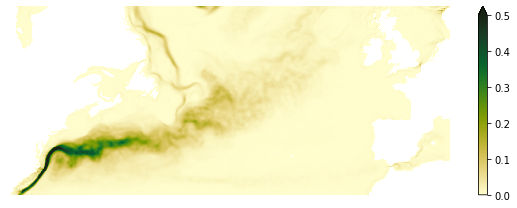

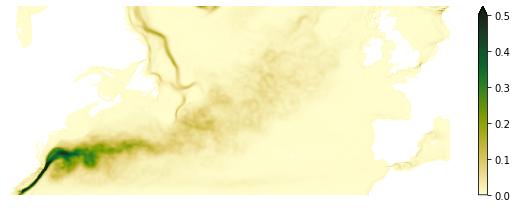

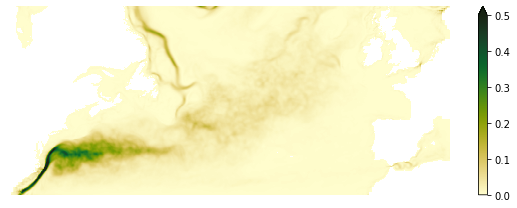

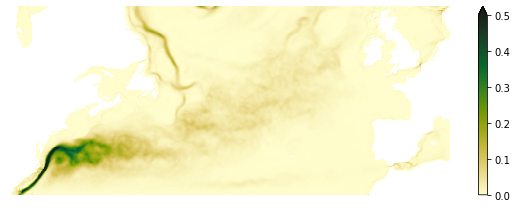

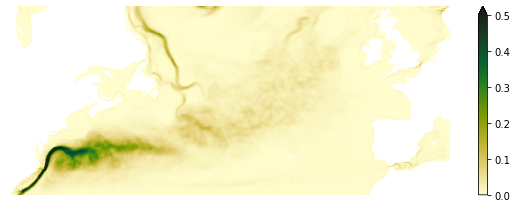

In [24]:
for ji, ekes in enumerate(ekes_all): 
    fig1 = plt.figure(figsize=(8,3))
    ax1 = fig1.add_subplot(111)
    ax1.set_facecolor('black')
    ekes.where(ekes>0).plot(ax=ax1, vmin=0,vmax=0.5, 
                            cmap=cmocean.cm.speed,
                            rasterized=True)
    ax1.set_axis_off()
    ax1.set_title('')
    #ax1.set_xlim([2400,3550])
    ax1.set_ylim([0,400])
    fig1.tight_layout()
    #fig1.savefig('figures/viking10_eke_sfc_natl_%d.pdf' % (ji,), format='pdf', dpi=150)

In [ ]:
eke_i_all = []

x1,x2,y1,y2 = 0,830,0,400

totarea = (tmask[0,:,:] * e1t*e2t).sel(x=slice(x1,x2), y=slice(y1,y2)).sum(('x','y'))
for ji, eke in enumerate(ekes_all):
    eke_i = (eke * tmask[0,:,:] * e1t * e2t).sel(x=slice(x1,x2), y=slice(y1,y2)).sum(('x','y')) / totarea
    eke_i_all.append(eke_i.compute())

In [ ]:
fig1, ax1 = plt.subplots(1,1)
years = 1950 + np.arange(0,5)
ax1.plot(years,eke_i_all,'-ok')
ax1.set_xlabel('Year')
ax1.set_ylabel('Global-mean EKE')

## North Atlantic corner

In [25]:
sst_all = []
for ji, ds_t in enumerate( t_5d_all ):
    
    sst = ds_t['votemper'].sel(deptht=0,method='nearest')
    t_y = sst.mean('time').compute()
    print(t_y)
    sst_all.append(t_y)

<xarray.DataArray 'votemper' (y: 869, x: 884)>
array([[23.16149  , 23.16149  , 23.16149  , ...,  0.       ,  0.       ,
         0.       ],
       [23.16149  , 23.16149  ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ..., -1.5789192, -1.5691568,
        -1.5495269],
       [-1.3716718, -1.3716718,  0.       , ..., -1.5794188, -1.5702837,
        -1.5516995],
       [-1.3716718, -1.3716718, -1.3716718, ..., -1.5806043, -1.572418 ,
        -1.5642316]], dtype=float32)
Coordinates:
    nav_lat  (y, x) float32 30.85 30.85 30.85 30.85 ... 76.6 76.56 76.52 76.48
    nav_lon  (y, x) float32 -82.16 -82.06 -81.96 -81.86 ... 52.14 52.21 52.28
    deptht   float32 3.047
Dimensions without coordinates: y, x
<xarray.DataArray 'votemper' (y: 869, x: 884)>
array([[23.232742 , 23.232742 , 23.232742 , ...,  0.       ,  0.       ,
       

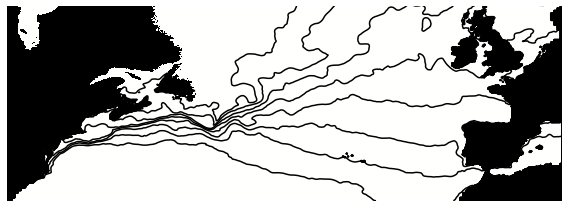

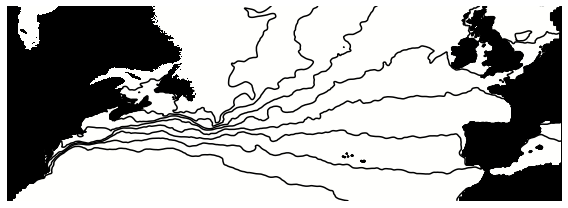

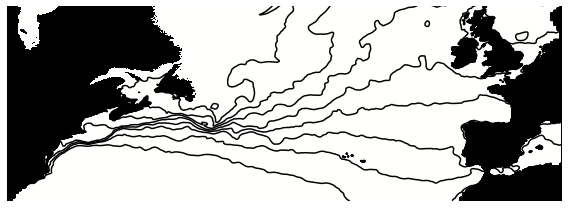

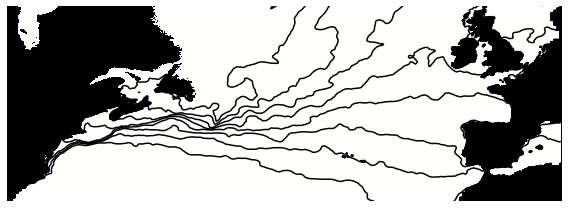

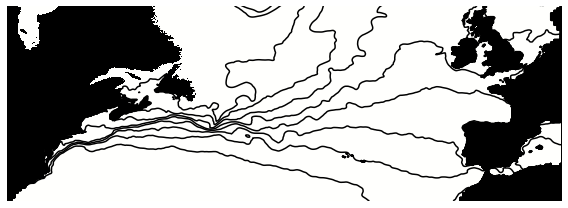

In [28]:
for ji, t in enumerate( sst_all ):
    
    fig1, ax1 = plt.subplots(1,1, figsize=(8,3))
    tmask[0,:,:].plot(ax=ax1, vmin=0, vmax=1, 
                      cmap=cmocean.cm.gray, 
                      add_colorbar=False,
                      rasterized=True)
    t.plot.contour(ax=ax1, levels=np.arange(6,22,2), colors='k')
    
    ax1.set_axis_off()
    ax1.set_title('')
    #ax1.set_xlim([2400,3100])
    ax1.set_ylim([0,400])
    fig1.tight_layout()
    #fig1.savefig('figures/Natl_sst_%d.pdf' % (ji,),format='pdf',dpi=150)